In [ ]:
# customer segmentation using k means clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
x= df.iloc[:,[3,4]]

In [ ]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


In [ ]:
wcss

[269981.28000000014,
 185917.1425392853,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 38858.959975143895,
 31969.42655023547,
 29858.48359760394,
 22209.851608025536,
 20786.936692059153]

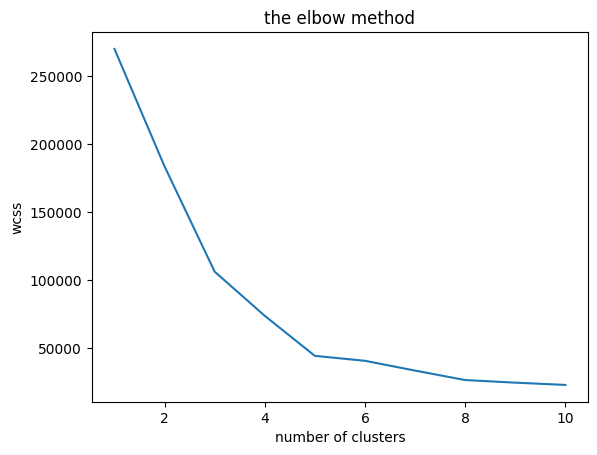

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)


In [ ]:
kmeans.predict([[15,39]])


array([4], dtype=int32)

In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
header = widgets.HTML(value="<h2 style='text-align:center;border-bottom:1px solid grey;'>Customer segmentation</h2>")

footer = widgets.HTML(value="<p style='text-align:center;'>© 211P011 - Customer segmentation</p>")

prediction_label = widgets.Label(value="Prediction: ")

annual_income_input = widgets.FloatText(description="Annual Income:")
spending_score_input = widgets.FloatText(description="Spending Score:")
predict_button = widgets.Button(description="Predict")



def display_plot(b):
    annual_income=annual_income_input.value
    spending_score=spending_score_input.value
    cluster_info = {
        0: "customer with medium annual income & medium annual spending score",
        1: "customer with high annual income & hig annual spending score",
        2: "customer with low annual income & low annual spending score",
        3: "customer with low annual income & high annual spending score",
        4: "customer with high annual income & high annual spending score"
    }
    with output:
        output.clear_output(wait=True)
        prediction=kmeans.predict([[annual_income,spending_score]])[0]
        print(prediction)
        if prediction==0:
            prediction_label.value=f"Prediction: {cluster_info[0]} "
        elif prediction==1:
            prediction_label.value=f"Prediction: {cluster_info[1]} "
        elif prediction==2:
              prediction_label.value=f"Prediction: {cluster_info[2]} "
        elif prediction==3:
              prediction_label.value=f"Prediction: {cluster_info[3]} "
        elif prediction==4:
              prediction_label.value=f"Prediction: {cluster_info[4]} "
        x_array = x.values

        plt.scatter(x_array[y_kmeans == 0, 0], x_array[y_kmeans == 0, 1], s=100, c='red', label='cluster 0')
        plt.scatter(x_array[y_kmeans == 1, 0], x_array[y_kmeans == 1, 1], s=100, c='blue', label='cluster 1')
        plt.scatter(x_array[y_kmeans == 2, 0], x_array[y_kmeans == 2, 1], s=100, c='green', label='cluster 2')
        plt.scatter(x_array[y_kmeans == 3, 0], x_array[y_kmeans == 3, 1], s=100, c='yellow', label='cluster 3')
        plt.scatter(x_array[y_kmeans == 4, 0], x_array[y_kmeans == 4, 1], s=100, c='orange', label='cluster 4')
        plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
        plt.title('Clusters of customers')
        plt.xlabel('Annual Income (k$)')
        plt.ylabel('Spending Score (1-100)')
        plt.legend()
        plt.show()



output = widgets.Output()


predict_button.on_click(display_plot)

top_row = widgets.HBox([widgets.VBox([annual_income_input,spending_score_input,predict_button, prediction_label]), output],
                       layout=widgets.Layout(align_items='center', justify_content='center'))
main_layout = widgets.VBox([header, top_row, footer],
                            layout=widgets.Layout(align_items='center', justify_content='center'))

display(main_layout)